# Introduction
This notebook contains an analysis of the Coursera Course Dataset from Kaggle. The notebook provides and describes steps of data importing, data cleaning, exploratory data analysis, data conversions, correlation calculations. At the end of the notebook are findings and insights from this analysis and future improvements.

In [480]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from scipy import stats
import functions

# Importing Data

In [481]:
# Load csv file into dataframe using pandas
filepath = "/Users/murtaza.aziz/Desktop/Turing College Tasks/Coursera Courses Data Viz/coursera_data.csv"
df = pd.read_csv(filepath, index_col=0)
df.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


# Data Cleaning

### Drop unwanted index and reset index

In [482]:
df.reset_index(drop=True, inplace=True)

### Clean column names

In [483]:
# Removing whitespaces, lower casing, and replacing spaces with underscores
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.head(10)

,course_title,course_organization,course_certificate_type,course_rating,course_difficulty,course_students_enrolled
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k
5,ADHD: Everyday Strategies for Elementary Students,University at Buffalo,COURSE,4.7,Beginner,39k
6,AI For Everyone,deeplearning.ai,COURSE,4.8,Beginner,350k
7,AI For Medical Treatment,deeplearning.ai,COURSE,4.8,Intermediate,2.4k
8,AI Foundations for Everyone,IBM,SPECIALIZATION,4.7,Beginner,61k
9,AI for Medical Diagnosis,deeplearning.ai,COURSE,4.7,Intermediate,12k


# Exploring Data

In [484]:
df.shape

(891, 6)

In [485]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   course_title              891 non-null    object 
 1   course_organization       891 non-null    object 
 2   course_certificate_type   891 non-null    object 
 3   course_rating             891 non-null    float64
 4   course_difficulty         891 non-null    object 
 5   course_students_enrolled  891 non-null    object 
dtypes: float64(1), object(5)
memory usage: 41.9+ KB


### Look at datatypes

In [486]:
df.dtypes

course_title                 object
course_organization          object
course_certificate_type      object
course_rating               float64
course_difficulty            object
course_students_enrolled     object
dtype: object

### Need to convert course_students_enrolled column datatype to integer to perform numerical analysis

In [487]:
df['course_students_enrolled'].unique()

array(['5.3k', '17k', '130k', '91k', '320k', '39k', '350k', '2.4k', '61k',
       '12k', '4k', '13k', '11k', '27k', '110k', '6.6k', '540k', '22k',
       '2.9k', '80k', '9.9k', '23k', '9.2k', '78k', '190k', '35k', '29k',
       '14k', '21k', '94k', '69k', '40k', '220k', '150k', '18k', '270k',
       '7.9k', '30k', '36k', '20k', '8.1k', '120k', '71k', '63k', '42k',
       '480k', '97k', '200k', '180k', '4.2k', '310k', '3.9k', '79k',
       '31k', '15k', '10k', '66k', '33k', '56k', '7.3k', '9.7k', '210k',
       '28k', '6.5k', '55k', '2.3k', '8.8k', '88k', '1.9k', '68k', '1.6k',
       '9.5k', '57k', '26k', '84k', '95k', '5.8k', '24k', '67k', '280k',
       '38k', '77k', '510k', '89k', '48k', '160k', '32k', '340k', '82k',
       '790k', '19k', '51k', '4.8k', '37k', '43k', '6.4k', '49k', '240k',
       '46k', '7.8k', '75k', '81k', '140k', '5.5k', '99k', '100k', '3k',
       '830k', '740k', '60k', '96k', '690k', '44k', '4.5k', '8.2k', '16k',
       '300k', '8k', '41k', '54k', '9k', '380k',

### Convert course_students_enrolled from object to float

In [488]:
# create function that replaces 'k' or 'm' character with numerical value of cell
df['course_students_enrolled'] = df['course_students_enrolled'].apply(
    functions.conv)
df.head(10)

,course_title,course_organization,course_certificate_type,course_rating,course_difficulty,course_students_enrolled
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5300.0
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17000.0
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130000.0
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91000.0
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320000.0
5,ADHD: Everyday Strategies for Elementary Students,University at Buffalo,COURSE,4.7,Beginner,39000.0
6,AI For Everyone,deeplearning.ai,COURSE,4.8,Beginner,350000.0
7,AI For Medical Treatment,deeplearning.ai,COURSE,4.8,Intermediate,2400.0
8,AI Foundations for Everyone,IBM,SPECIALIZATION,4.7,Beginner,61000.0
9,AI for Medical Diagnosis,deeplearning.ai,COURSE,4.7,Intermediate,12000.0


### Convert course_students_enrolled from float to int

In [489]:
df['course_students_enrolled'] = df['course_students_enrolled'].astype(int)
df.head()

,course_title,course_organization,course_certificate_type,course_rating,course_difficulty,course_students_enrolled
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5300
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17000
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130000
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91000
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320000


### Check for null values

In [490]:
# Use of isnull() and sum() functions to calculate number of rows that include nulls
df.isna().sum()

course_title                0
course_organization         0
course_certificate_type     0
course_rating               0
course_difficulty           0
course_students_enrolled    0
dtype: int64

### Check for duplicates values

In [491]:
df.duplicated(df.columns).sum()

np.int64(0)

### Descriptive stats of numerical columns

In [492]:
df.describe()

,course_rating,course_students_enrolled
count,891.000000,8.910000e+02
mean,4.677329,9.055208e+04
std,0.162225,1.819365e+05
min,3.300000,1.500000e+03
25%,4.600000,1.750000e+04
50%,4.700000,4.200000e+04
75%,4.800000,9.950000e+04
max,5.000000,3.200000e+06


### Correlation between Course Rating and Students Enrolled

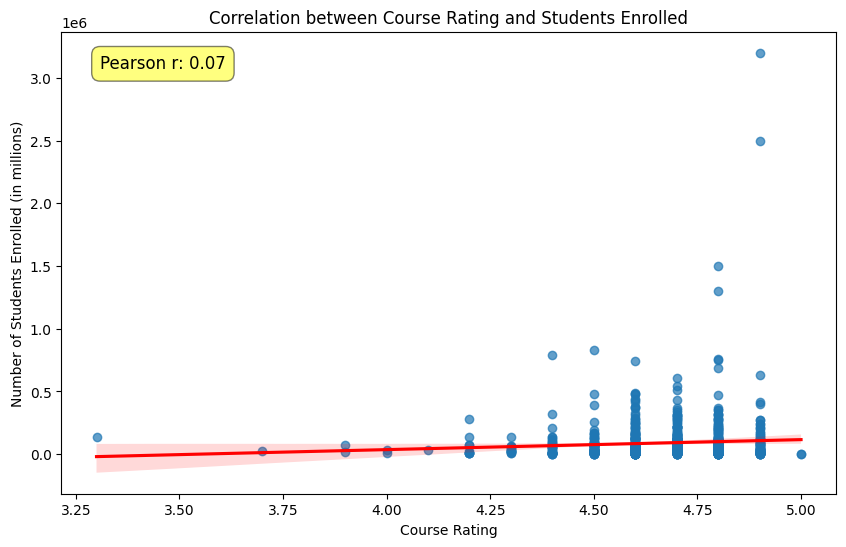

In [493]:
# Calculate pearson r correlation value
pearson_corr, _ = stats.pearsonr(
    df['course_rating'], df['course_students_enrolled'])

# Use matplotlib and seaborn to create a scatter plot with regression line
plt.figure(figsize=(10, 6))
sn.regplot(x='course_rating', y='course_students_enrolled', data=df,
           scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})

# Add the Pearson correlation coefficient to the plot
plt.text(0.05, 0.95, f'Pearson r: {pearson_corr:.2f}', transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))

# Add titles and labels and display the plot:
plt.title('Correlation between Course Rating and Students Enrolled')
plt.xlabel('Course Rating')
plt.ylabel('Number of Students Enrolled (in millions)')
plt.show()

The correlation coefficient of 0.07 shows a weak correlation between a course's rating and the number of students enrolled in that course

### Histogram showing distribution of course ratings

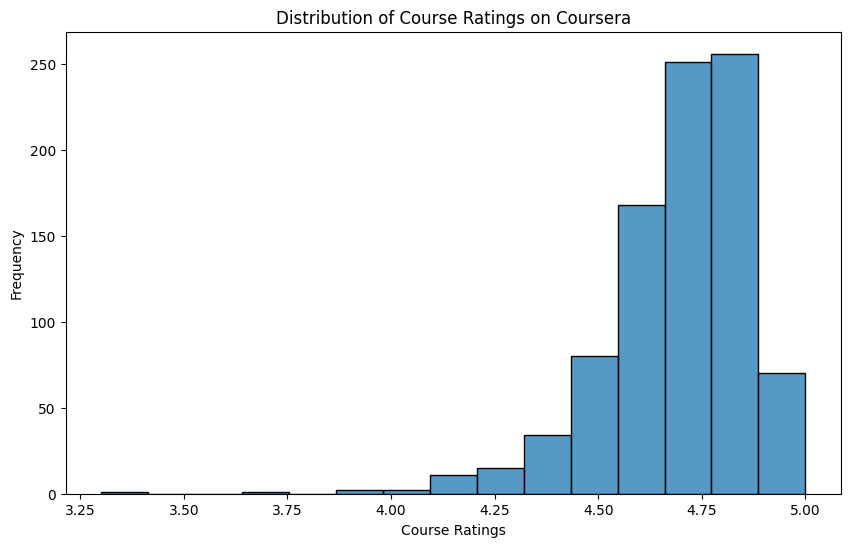

In [494]:
plt.figure(figsize=(10, 6))
sn.histplot(df['course_rating'], bins=15)
plt.title('Distribution of Course Ratings on Coursera')
plt.xlabel('Course Ratings')
plt.ylabel('Frequency')
plt.show()

### Counts of courses by difficulty

In [495]:
courses_difficulty = df.groupby('course_difficulty').course_title.count(
).sort_values(ascending=False)
courses_difficulty

course_difficulty
Beginner        487
Intermediate    198
Mixed           187
Advanced         19
Name: course_title, dtype: int64

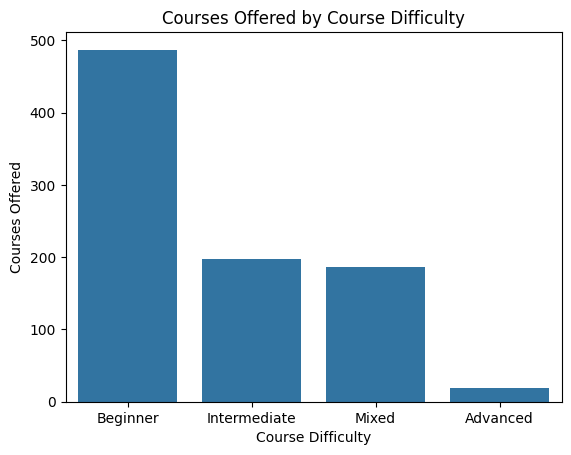

In [518]:
sn.barplot(data=courses_difficulty)
plt.title('Courses Offered by Course Difficulty')
plt.ylabel('Courses Offered')
plt.xlabel('Course Difficulty')
plt.show()

### Number of students enrolled grouped by difficulty

In [497]:
course_difficulty_student_count = df.groupby(['course_difficulty']).course_students_enrolled.sum(
).sort_values(ascending=False)
course_difficulty_student_count

course_difficulty
Beginner        39921800
Mixed           24989400
Intermediate    14506300
Advanced         1264400
Name: course_students_enrolled, dtype: int64

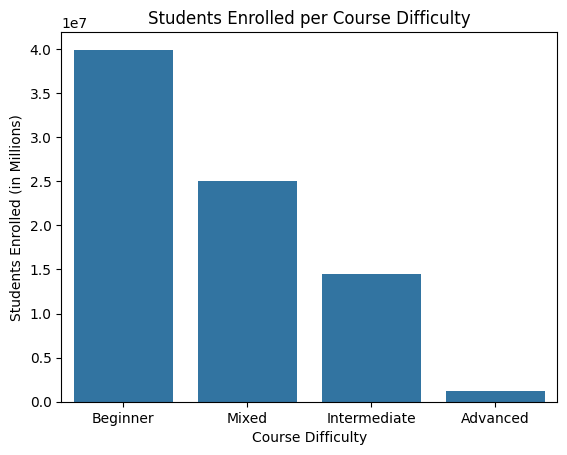

In [498]:
sn.barplot(data=course_difficulty_student_count)
plt.title('Students Enrolled per Course Difficulty')
plt.ylabel('Students Enrolled (in Millions)')
plt.xlabel('Course Difficulty')
plt.show()

### Counts of courses based on Certificate Type

In [499]:
courses_certificate_type = df.groupby(
    'course_certificate_type').course_title.count().sort_values(ascending=False)
courses_certificate_type

course_certificate_type
COURSE                      582
SPECIALIZATION              297
PROFESSIONAL CERTIFICATE     12
Name: course_title, dtype: int64

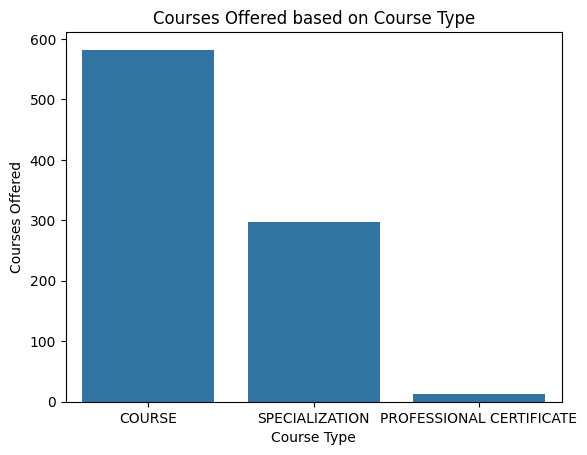

In [500]:
sn.barplot(data=courses_certificate_type)
plt.title('Courses Offered based on Course Type')
plt.ylabel('Courses Offered')
plt.xlabel('Course Type')
plt.show()

### Number of students enrolled grouped by Certificate Type

In [501]:
cert_type_student_count = df.groupby(['course_certificate_type']
           ).course_students_enrolled.sum().sort_values(ascending=False)
cert_type_student_count 

course_certificate_type
COURSE                      51131300
SPECIALIZATION              27262200
PROFESSIONAL CERTIFICATE     2288400
Name: course_students_enrolled, dtype: int64

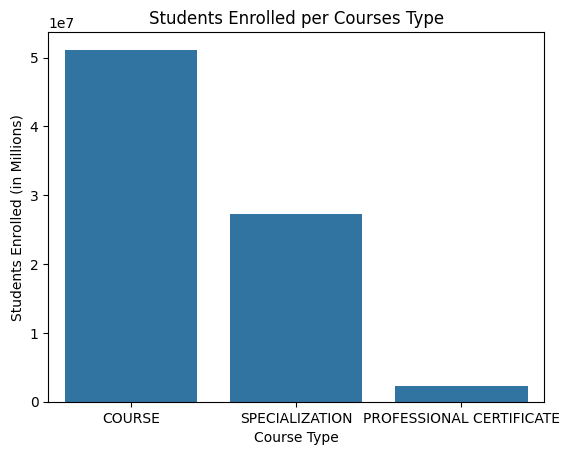

In [502]:
sn.barplot(data=cert_type_student_count)
plt.title('Students Enrolled per Courses Type')
plt.ylabel('Students Enrolled (in Millions)')
plt.xlabel('Course Type')
plt.show()

### Number of courses by organization (Top 5)

In [503]:
courses_organization = df.groupby('course_organization').course_title.count(
).sort_values(ascending=False).head(5)
courses_organization

course_organization
University of Pennsylvania    59
University of Michigan        41
Google Cloud                  34
Duke University               28
Johns Hopkins University      28
Name: course_title, dtype: int64

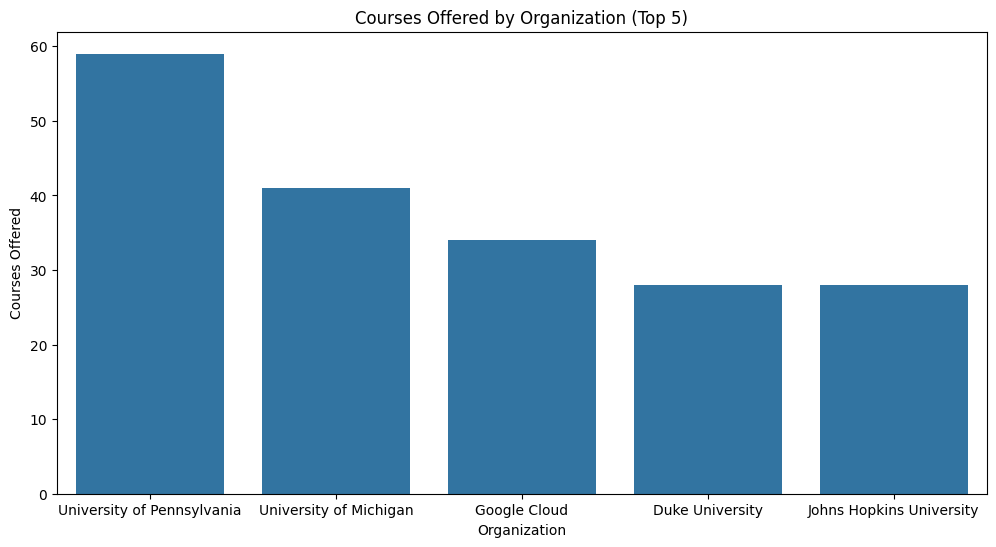

In [504]:
plt.figure(figsize=(12, 6))
sn.barplot(data=courses_organization)
plt.title('Courses Offered by Organization (Top 5)')
plt.ylabel('Courses Offered')
plt.xlabel('Organization')
plt.show()

### Number of students enrolled grouped by organization (Top 5)

In [505]:
org_student_count = df.groupby(['course_organization']).course_students_enrolled.sum(
).sort_values(ascending=False).head()
org_student_count

course_organization
University of Michigan              7437700
University of Pennsylvania          5501300
Stanford University                 4854000
University of California, Irvine    4326000
Johns Hopkins University            4298900
Name: course_students_enrolled, dtype: int64

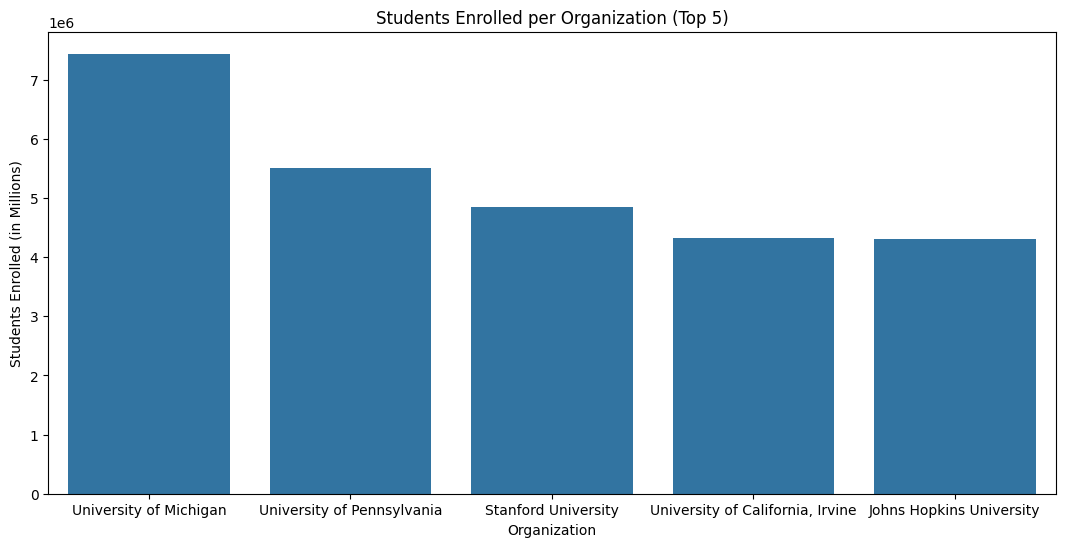

In [506]:
plt.figure(figsize=(13,6))
sn.barplot(data=org_student_count)
plt.title('Students Enrolled per Organization (Top 5)')
plt.ylabel('Students Enrolled (in Millions)')
plt.xlabel('Organization')
plt.show()

### Highest rated courses

In [516]:
rated_courses = df.groupby(['course_title', 'course_rating'])
highest_rated_courses = rated_courses.max().sort_values(
    by='course_rating', ascending=False).head(3)
highest_rated_courses

,,course_organization,course_certificate_type,course_difficulty,course_students_enrolled
course_title,course_rating,,,,
Infectious Disease Modelling,5.0,Imperial College London,SPECIALIZATION,Intermediate,1600
El Abogado del Futuro: Legaltech y la Transformación Digital del Derecho,5.0,Universidad Austral,COURSE,Beginner,1500
Excel Skills for Business,4.9,Macquarie University,SPECIALIZATION,Beginner,240000


### Lowest rated courses

In [508]:
lowest_rated_courses = rated_courses.min().sort_values(
    by='course_rating', ascending=True).head(3)
lowest_rated_courses

,,,course_organization,course_certificate_type,course_difficulty
course_title,course_rating,course_students_enrolled,,,
How To Create a Website in a Weekend! (Project-Centered Course),3.3,140000,The State University of New York,COURSE,Mixed
Machine Learning and Reinforcement Learning in Finance,3.7,29000,New York University,SPECIALIZATION,Intermediate
iOS App Development with Swift,3.9,76000,University of Toronto,SPECIALIZATION,Intermediate


### Most enrolled courses

In [509]:
courses_enrolled = df.groupby(['course_title', 'course_students_enrolled'])
top3_enrolled_courses = courses_enrolled.max().sort_values(
    by=['course_students_enrolled'], ascending=False).head(3)
top3_enrolled_courses

,,course_organization,course_certificate_type,course_rating,course_difficulty
course_title,course_students_enrolled,,,,
Machine Learning,3200000,Stanford University,COURSE,4.9,Mixed
The Science of Well-Being,2500000,Yale University,COURSE,4.9,Mixed
Python for Everybody,1500000,University of Michigan,SPECIALIZATION,4.8,Beginner


### Least enrolled course

In [510]:
least_enrolled_courses = courses_enrolled.min().sort_values(
    by=['course_students_enrolled'], ascending=True).head(3)
least_enrolled_courses

,,course_organization,course_certificate_type,course_rating,course_difficulty
course_title,course_students_enrolled,,,,
El Abogado del Futuro: Legaltech y la Transformación Digital del Derecho,1500,Universidad Austral,COURSE,5.0,Beginner
Infectious Disease Modelling,1600,Imperial College London,SPECIALIZATION,5.0,Intermediate
Blockchain Revolution in Financial Services,1600,INSEAD,SPECIALIZATION,4.6,Beginner


### Certificate Type grouped by Organizations (Top 10)

In [511]:
organization_cert_type = pd.crosstab(df['course_organization'], df['course_certificate_type'])
organization_cert_type_sorted = organization_cert_type.sort_values(
    by=['COURSE', 'SPECIALIZATION'], ascending=False)
organization_cert_type_sorted.head(10)

course_certificate_type,COURSE,PROFESSIONAL CERTIFICATE,SPECIALIZATION
course_organization,,,
University of Pennsylvania,44,0,15
University of Michigan,30,0,11
Duke University,22,0,6
Google Cloud,17,2,15
Johns Hopkins University,17,0,11
University of Virginia,16,0,3
Yale University,16,0,1
Stanford University,15,0,1
IBM,13,3,6


### Certificate Type by Course Difficulty

In [512]:
cert_type_difficulty = df.groupby(
    ['course_certificate_type', 'course_difficulty'])
cert_type_difficulty_counts = cert_type_difficulty.agg(
    {'course_difficulty': ['count']})
cert_type_difficulty_counts

course_difficulty
                                                       count
course_certificate_type  course_difficulty                  
COURSE                   Advanced                          9
                         Beginner                        282
                         Intermediate                    104
                         Mixed                           187
PROFESSIONAL CERTIFICATE Beginner                          9
                         Intermediate                      3
SPECIALIZATION           Advanced                         10
                         Beginner                        196
                         Intermediate                     91

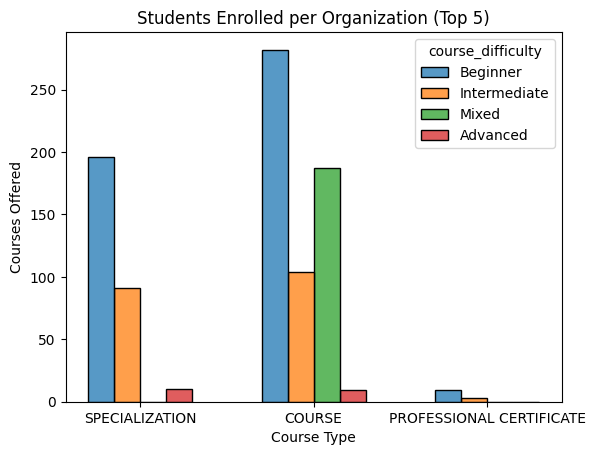

In [513]:
sn.histplot(data=df, x='course_certificate_type',
            hue='course_difficulty', multiple='dodge', shrink=0.6)
plt.title('Students Enrolled per Organization (Top 5)')
plt.ylabel('Courses Offered')
plt.xlabel('Course Type')
plt.show()

# Findings and Insights
- There are 891 course titles and 154 unique organizations represented in this dataset.
- 3 types of courses are offered: Individual Course, Specialization, and Professional Certificate
- 4 Course Difficulties exist: Beginner, Intermediate, Mixed, and Advanced

### Statistical Findings
- There is a very weak correlation between the number of students enrolled and course ratings (r = 0.07)
- Course ratings range from 3.3 to 5.0 but skew generally between 4.5 and 4.9

### General Insights
- Most students are enrolled in Beginner level and Individual courses
- One of the highest rated courses (5.0) is also the least enrolled (1500 students)
- Beginner courses are widely offered, while there are only 19 Advanced courses offered
- Individual courses have >51 million students enrolled while professional certificates have ~2.3 million students enrolled

### Organizational Insights
- University of Pennsylvania offers the most number of courses with 44 Individual courses and 15 Specializations; no professional certificates
- University of Michigan has the most number of student's enrolled with ~7.4 million students


# Future Improvements

- Look further into what drives ratings on Coursera.
- Does course difficulty affect the number of students enrolled in a course, specialization, or certificate?
- Which institutions offer professional certificates?


